## 데이터불러오기 (지역화폐 발행 및 이용현황)

In [1]:
import pandas as pd

# Load the CSV files
file1_path = '지역화폐발행및이용현황_2019~2022.csv'  

file2_path = '지역화폐발행및이용현황_2023.csv'

df_2022d = pd.read_csv(file1_path, encoding='euc-kr')
df_2023 = pd.read_csv(file2_path, encoding='euc-kr')

# 색상 팔레트
cluster_colors = ['#2E5BA3', '#4F92FF', '#B6D1FA', '#979797']
cluster_colors2 = ['#2E5BA3','#79BEC9', '#B6D1FA', '#8DDEEB', '#4F92FF', '#DCE7FA', '#979797', '#D9D9D9']
cluster_colors3 = ['#79BEC9', '#A3C2F4', '#8DDEEB', '#2E5BA3', '#4F92FF', '#979797', '#C9C9C9', '#D0DBEE']
cluster_colors4 = ['#79BEC9', '#B6D1FA', '#8DDEEB', '#4F92FF', '#ECF3FF', '#979797', '#D9D9D9', '#DCE7FA']

# 맥북용
# df_2022d = pd.read_csv(file1_path, encoding='cp949')
# df_2023 = pd.read_csv(file2_path, encoding='cp949')


c:\Users\home\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\home\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


-----


In [2]:
# 한글 글꼴 설정 (macOS에서 사용 가능한 한글 글꼴)
# from matplotlib import font_manager, rc

# font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # macOS에서 'AppleGothic' 글꼴을 사용합니다
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

## 전처리

### 1.데이터 확인

In [3]:
df_2022d.shape

(1488, 5)

In [4]:
df_2023.shape

(372, 5)

In [5]:
df_2022d.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(천원),월별사용액(천원)
0,가평군,2022-12,814.0,3600881.0,3996840.0
1,가평군,2022-11,701.0,4356413.0,3673972.0
2,가평군,2022-10,657.0,3205893.0,3586395.0
3,가평군,2022-09,832.0,4334836.0,3773560.0
4,가평군,2022-08,858.0,3091351.0,3600543.0


In [6]:
df_2023.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(백만원),월별사용액(백만원)
0,가평군,2023-12,484.0,4051,2140
1,가평군,2023-11,458.0,2368,2187
2,가평군,2023-10,555.0,2596,2335
3,가평군,2023-09,782.0,3113,2376
4,가평군,2023-08,473.0,3631,2392


In [7]:
len(df_2023['시군명'].unique())

31

In [8]:
df_2023.isnull().sum()

시군명            0
기준년월           0
월별신규가입자수(명)    2
월별충전액(백만원)     0
월별사용액(백만원)     0
dtype: int64

In [9]:
df_2022d.isnull().sum()

시군명              0
기준년월             0
월별신규가입자수(명)    222
월별충전액(천원)      181
월별사용액(천원)      181
dtype: int64

### 2.2019년까지 있는 데이터를 2021년부터 2023년까지만 다루기위해 데이터 슬라이싱


In [10]:
df_2022d = df_2022d[df_2022d['기준년월'].str[:4].astype(int).between(2021, 2023)]

df_2022d.tail()

,시군명,기준년월,월별신규가입자수(명),월별충전액(천원),월별사용액(천원)
1459,화성시,2021-05,7615.0,26955815.0,27578227.0
1460,화성시,2021-04,23662.0,27897920.0,27898856.0
1461,화성시,2021-03,13378.0,18016255.0,20192514.0
1462,화성시,2021-02,23305.0,18016255.0,20192514.0
1463,화성시,2021-01,12936.0,32845088.0,31312763.0


In [11]:
df_2022d.shape

(744, 5)

### 3.금액단위를 만원단위로 맞추기 => 중요 지표인 충전금액,결제금액 등의 단위 통일을 위해서

- 천원단위->만원단위

In [12]:
df_2022d['월별충전액(천원)']=round(df_2022d['월별충전액(천원)']/10) #반올림해서 소수점 제거


In [13]:
df_2022d['월별사용액(천원)']=round(df_2022d['월별사용액(천원)']/10)

In [15]:
df_2022d.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(천원),월별사용액(천원)
0,가평군,2022-12,814.0,360088.0,399684.0
1,가평군,2022-11,701.0,435641.0,367397.0
2,가평군,2022-10,657.0,320589.0,358640.0
3,가평군,2022-09,832.0,433484.0,377356.0
4,가평군,2022-08,858.0,309135.0,360054.0


- 백만원단위->만원단위

In [16]:
df_2023['월별충전액(백만원)']=df_2023['월별충전액(백만원)']*100

In [17]:
df_2023['월별사용액(백만원)']=df_2023['월별사용액(백만원)']*100

In [18]:
df_2023.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(백만원),월별사용액(백만원)
0,가평군,2023-12,484.0,405100,214000
1,가평군,2023-11,458.0,236800,218700
2,가평군,2023-10,555.0,259600,233500
3,가평군,2023-09,782.0,311300,237600
4,가평군,2023-08,473.0,363100,239200


### 4.데이터 concat

**최근 3개년의 데이터만 분석할거기 때문에 19~22년도 데이터 와 23년도 데이터를 21~23년도 데이터만 합쳐서 뽑아낸다**

- 데이터 컬럼이름 맞춰주기()

In [19]:
df_2022d.columns=['시군명','기준년월','월별신규가입자수(명)','월별충전액(만원)','월별사용액(만원)']

In [20]:
df_2023.columns=['시군명','기준년월','월별신규가입자수(명)','월별충전액(만원)','월별사용액(만원)']

In [21]:
print(df_2023.shape)
print(df_2022d.shape)

(372, 5)
(744, 5)


In [22]:
Data2=pd.concat([df_2023,df_2022d],ignore_index=True)
Data2.to_csv('Data2_전처리.csv',index=False)
Data2.tail()

,시군명,기준년월,월별신규가입자수(명),월별충전액(만원),월별사용액(만원)
1111,화성시,2021-05,7615.0,2695582.0,2757823.0
1112,화성시,2021-04,23662.0,2789792.0,2789886.0
1113,화성시,2021-03,13378.0,1801626.0,2019251.0
1114,화성시,2021-02,23305.0,1801626.0,2019251.0
1115,화성시,2021-01,12936.0,3284509.0,3131276.0


----
## 군집화를 위한 추가전처리

> 군집으로 분석하기위해 분석단위를 '기준년월' 이아닌 '기준연도'로 잡았으므로, 월별 데이터를 년별 데이터로 합쳐준다

> 주요 변수인 신규가입자수 와 충전금액을 위주로 분석하기위해 전처리한다

- 기준연도 컬럼 추가(datetime type)

In [23]:
Data2['기준연도'] = pd.to_datetime(Data2['기준년월'])
Data2['기준연도']=Data2['기준연도'].dt.year

In [24]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군명          1116 non-null   object 
 1   기준년월         1116 non-null   object 
 2   월별신규가입자수(명)  1042 non-null   float64
 3   월별충전액(만원)    1070 non-null   float64
 4   월별사용액(만원)    1070 non-null   float64
 5   기준연도         1116 non-null   int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 48.1+ KB


In [25]:
Data2.isnull().sum()

시군명             0
기준년월            0
월별신규가입자수(명)    74
월별충전액(만원)      46
월별사용액(만원)      46
기준연도            0
dtype: int64

- 결측지를 평균값으로 채워넣는다

In [26]:
# 각 연도별 평균값 계산
yearly_mean_new_subscribers = Data2.groupby('기준연도')['월별신규가입자수(명)'].transform('mean')
yearly_mean_recharge_amount = Data2.groupby('기준연도')['월별충전액(만원)'].transform('mean')

# null 값을 연도별 평균값으로 채우기
Data2['월별신규가입자수(명)'] = Data2['월별신규가입자수(명)'].fillna(yearly_mean_new_subscribers)
Data2['월별충전액(만원)'] = Data2['월별충전액(만원)'].fillna(yearly_mean_recharge_amount)


In [27]:
Data2.isnull().sum()

시군명             0
기준년월            0
월별신규가입자수(명)     0
월별충전액(만원)       0
월별사용액(만원)      46
기준연도            0
dtype: int64

- 신규가입자수 와 충전액이 군집별로 비교해볼만한 요소이므로 이를 연도별 시군별로 나타내야한다

In [28]:
average_new_subscribers = Data2.groupby(['기준연도', '시군명'])[['월별신규가입자수(명)','월별충전액(만원)']].sum().reset_index()
average_new_subscribers.isnull().sum()

기준연도           0
시군명            0
월별신규가입자수(명)    0
월별충전액(만원)      0
dtype: int64

In [29]:
average_new_subscribers

,기준연도,시군명,월별신규가입자수(명),월별충전액(만원)
0,2021,가평군,13043.0,1773996.0
1,2021,고양시,201819.0,22711180.0
2,2021,과천시,20897.0,3611000.0
3,2021,광명시,66295.0,10260619.0
4,2021,광주시,158752.0,17469409.0
...,...,...,...,...
88,2023,파주시,108008.0,21634600.0
89,2023,평택시,110882.0,19601900.0
90,2023,포천시,10285.0,3865900.0
91,2023,하남시,29096.0,14169300.0


- 신규가입자와 월별 충전액의 군집별 결과를 보기위한 데이터 완성 및 추출

In [30]:
average_new_subscribers.to_csv('Data2_신규가입자.csv',index=False)

In [31]:
average_new_subscribers[average_new_subscribers['기준연도']==2023].shape

(31, 4)

---

<h3>[시각화로 변수 추이보기(주요 시군만)]</h3>

<h4>1.상위권 7개 시군 중 하나인 평택시 시각화<h4>

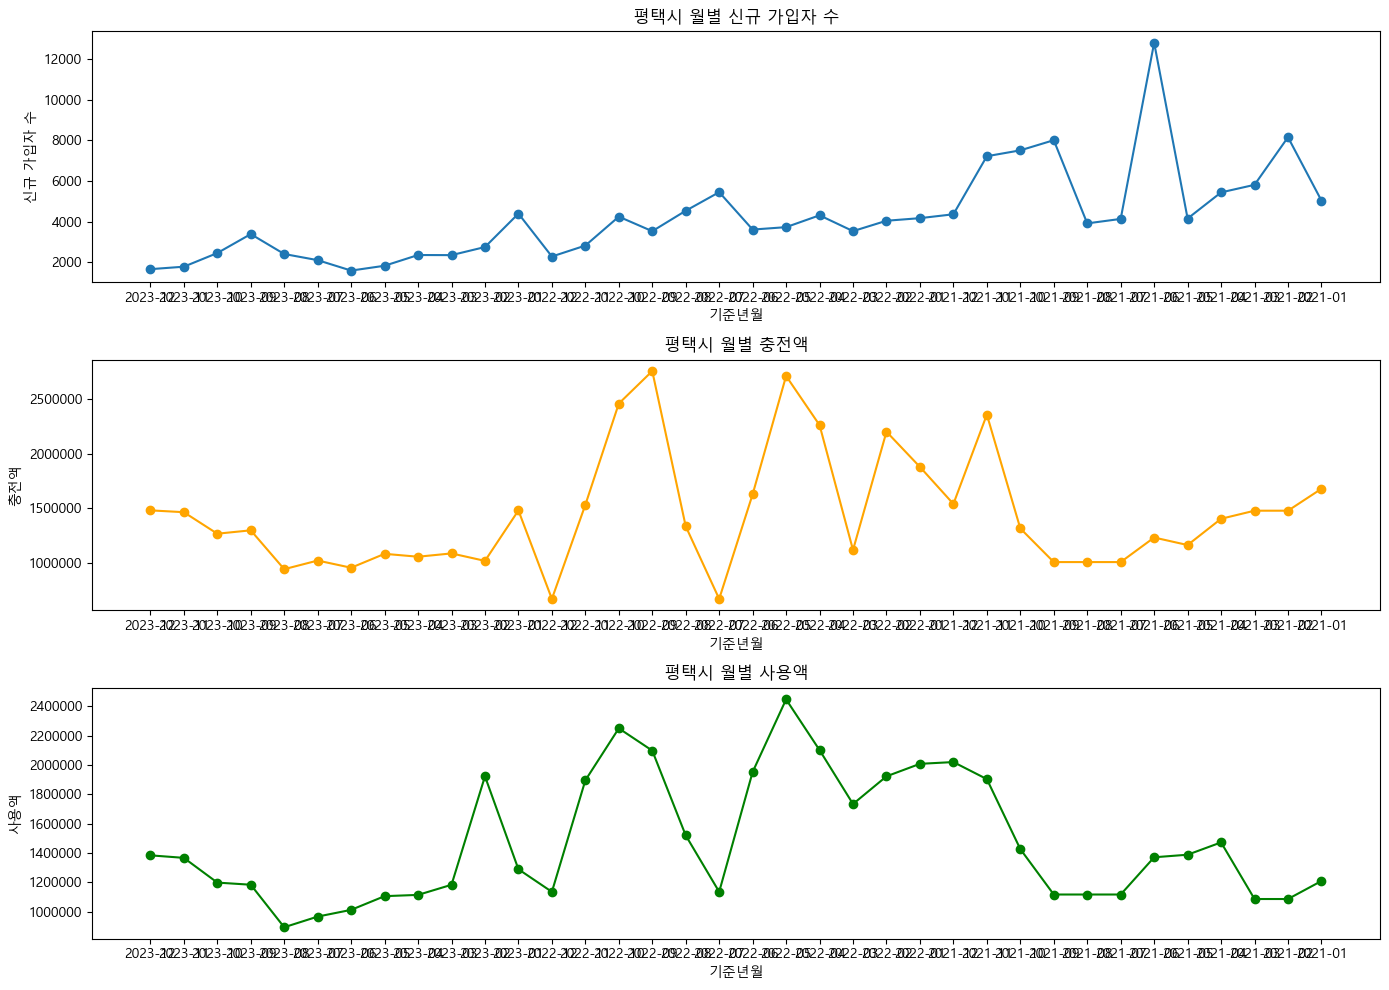

In [32]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
from matplotlib.ticker import ScalarFormatter

# 평택시 데이터 필터링
pyeongtaek_df = Data2[Data2['시군명'] == '하남시']

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 월별 신규 가입자 수 시각화
plt.subplot(3, 1, 1)
plt.plot(pyeongtaek_df['기준년월'], pyeongtaek_df['월별신규가입자수(명)'], marker='o')
plt.title('평택시 월별 신규 가입자 수')
plt.xlabel('기준년월')
plt.ylabel('신규 가입자 수')

# 월별 충전액 시각화
plt.subplot(3, 1, 2)
plt.plot(pyeongtaek_df['기준년월'], pyeongtaek_df['월별충전액(만원)'], marker='o', color='orange')
plt.title('평택시 월별 충전액')
plt.xlabel('기준년월')
plt.ylabel('충전액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

# 월별 사용액 시각화
plt.subplot(3, 1, 3)
plt.plot(pyeongtaek_df['기준년월'], pyeongtaek_df['월별사용액(만원)'], marker='o', color='green')
plt.title('평택시 월별 사용액')
plt.xlabel('기준년월')
plt.ylabel('사용액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

# 레이아웃 조정
plt.tight_layout()
plt.show()

<h4>2.하위권 3개 시군 중 하나인 동두천시 시각화</h4>

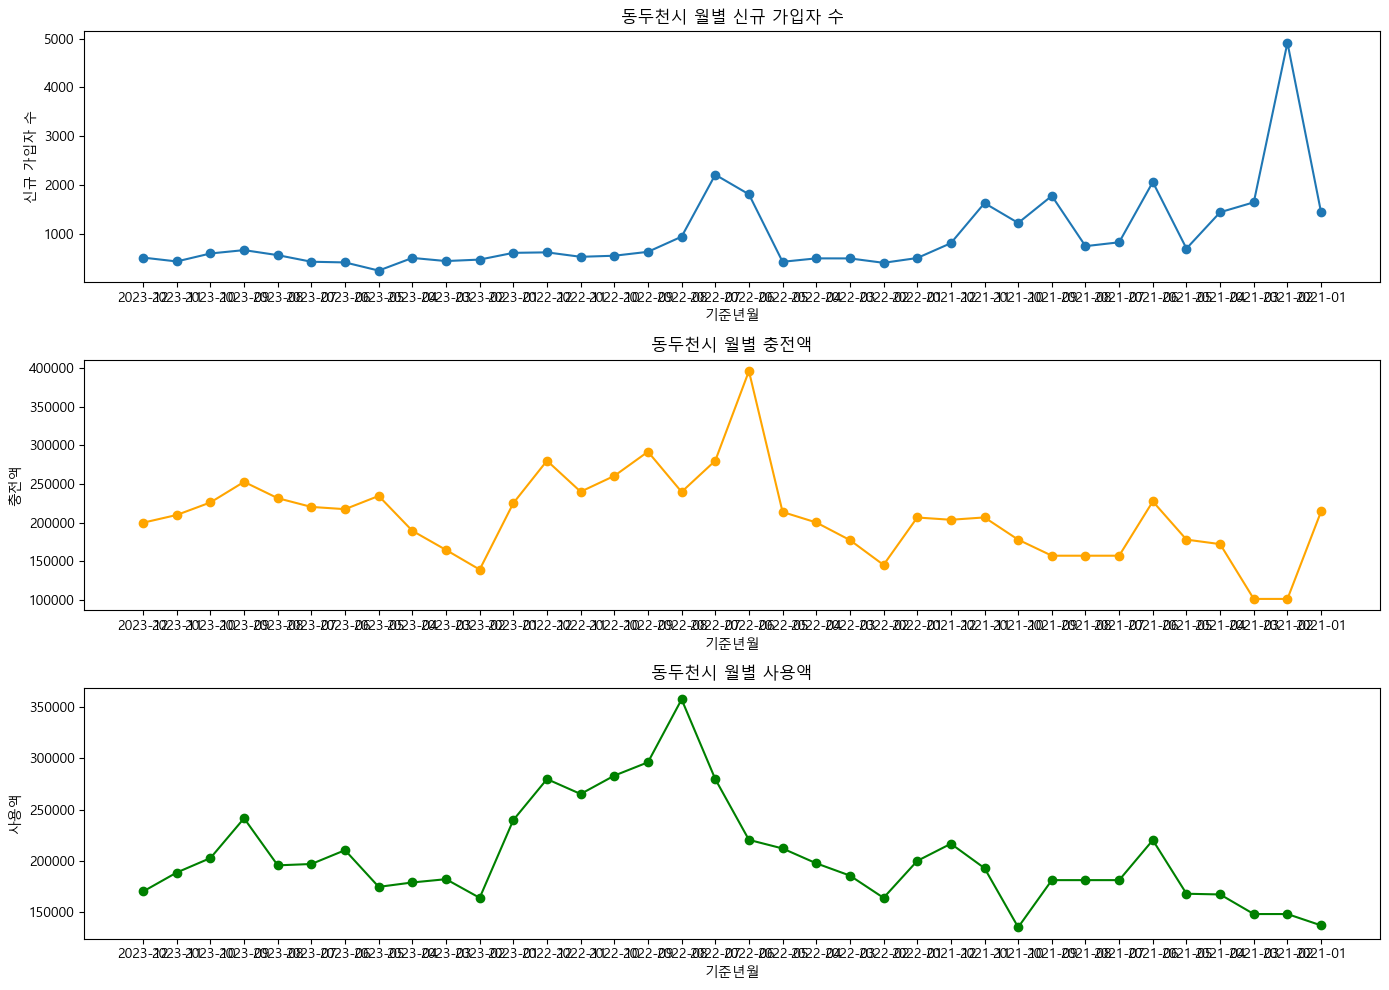

In [33]:
# 동두천시 데이터 필터링
dongducheon_df = Data2[Data2['시군명'] == '동두천시']

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 월별 신규 가입자 수 시각화
plt.subplot(3, 1, 1)
plt.plot(dongducheon_df['기준년월'], dongducheon_df['월별신규가입자수(명)'], marker='o')
plt.title('동두천시 월별 신규 가입자 수')
plt.xlabel('기준년월')
plt.ylabel('신규 가입자 수')

# 월별 충전액 시각화
plt.subplot(3, 1, 2)
plt.plot(dongducheon_df['기준년월'], dongducheon_df['월별충전액(만원)'], marker='o', color='orange')
plt.title('동두천시 월별 충전액')
plt.xlabel('기준년월')
plt.ylabel('충전액')


# 월별 사용액 시각화
plt.subplot(3, 1, 3)
plt.plot(dongducheon_df['기준년월'], dongducheon_df['월별사용액(만원)'], marker='o', color='green')
plt.title('동두천시 월별 사용액')
plt.xlabel('기준년월')
plt.ylabel('사용액')

# 레이아웃 조정
plt.tight_layout()
plt.show()

---

## 총신규가입자수 추이 시각화


- 군집화 주요 변수인 신규가입자수의 시군별 추이를 확인한다

In [34]:
df_group1_12 = Data2.groupby(['시군명', '기준연도'], as_index=False) \
              .agg(totalPay=('월별사용액(만원)', 'sum'), 
                   totalNewSubscribers=('월별신규가입자수(명)', 'sum')) \
             

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
from matplotlib.ticker import ScalarFormatter
fig = px.line(data_frame=df_group1_12, x='기준연도', y='totalNewSubscribers', color='시군명', markers=True, line_shape='linear', title='시군별 신규가입자수 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='신규가입자수',
    legend_title='시군명',
    title='시군별 신규가입자수 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df_group1_12['기준연도'].unique())


-------


## 각 변수(신규가입자,충전금액) 의 변화율 정도를 확인하여 위 2개의 변수가 우리의 목표지표(KPI)에 반영될 정도를 판단한다(가중치판단)

### 시군별 신규가입자수 충전금액 변화율 보기

- 

In [66]:
df2_group_sgy = Data2.groupby(['시군명', '기준연도'], as_index=False) \
              .agg(총충전금액=('월별사용액(만원)', 'sum'), 
                   총신규가입자수=('월별신규가입자수(명)', 'sum')) \
               .sort_values('총신규가입자수',ascending=False)
              

In [67]:
df2_group_sgy

,시군명,기준연도,총충전금액,총신규가입자수
36,수원시,2021,32086696.0,238658.0
66,용인시,2021,28349528.0,206404.0
3,고양시,2021,22776329.0,201819.0
30,부천시,2021,24694265.0,180770.0
50,안양시,2023,26560800.0,169450.0
...,...,...,...,...
60,연천군,2021,1239240.0,8394.0
1,가평군,2022,3729533.0,8291.0
61,연천군,2022,2143581.0,7911.0
62,연천군,2023,2279700.0,6553.0


- 변화율계산

In [69]:



df2_group_sgy['총충전금액변화율'] = df2_group_sgy.groupby('시군명')['총충전금액'].pct_change() * 100
df2_group_sgy['총신규가입자수변화율'] = df2_group_sgy.groupby('시군명')['총신규가입자수'].pct_change() * 100



In [70]:
df2_group_sgy

,시군명,기준연도,총충전금액,총신규가입자수,총충전금액변화율,총신규가입자수변화율
36,수원시,2021,32086696.0,238658.0,NaN,NaN
66,용인시,2021,28349528.0,206404.0,NaN,NaN
3,고양시,2021,22776329.0,201819.0,NaN,NaN
30,부천시,2021,24694265.0,180770.0,NaN,NaN
50,안양시,2023,26560800.0,169450.0,NaN,NaN
...,...,...,...,...,...,...
60,연천군,2021,1239240.0,8394.0,NaN,NaN
1,가평군,2022,3729533.0,8291.0,3.334063,-21.464431
61,연천군,2022,2143581.0,7911.0,72.975453,-5.754110
62,연천군,2023,2279700.0,6553.0,6.350075,-17.165971


- 신규가입자 변화율 시각화

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
from matplotlib.ticker import ScalarFormatter
fig = px.line(data_frame=df2_group_sgy, x='기준연도', y='총신규가입자수변화율', color='시군명', markers=True, line_shape='linear', title='시군별 신규가입자수 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='신규가입자수',
    legend_title='시군명',
    title='시군별 신규가입자수 변화율 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=[2021,2022,2023])

> 신규가입자의 변화율은 0을 넘는것이 없다. 지역화폐의 활성화를 시킬수있는 중요한 지표이긴하지만 가중치를 너무 높이면 지표자체가 망가질수있을것같다**

- 충전금액`=`결제금액 변화율 시각화

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
from matplotlib.ticker import ScalarFormatter
fig = px.line(data_frame=df2_group_sgy, x='기준연도', y='총충전금액변화율', color='시군명', markers=True, line_shape='linear', title='시군별 신규가입자수 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='신규가입자수',
    legend_title='시군명',
    title='시군별 신규가입자수 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df_group1_12['기준연도'].unique())

> 충전금액이 지역화폐 활성화에 직결된 지표이고 , 변화율 수치들이 좋고, 일정한 수준을 각 시군별로 유지하고 있기때문에 높은 가중치를 둬도 괜찮을것 같다.**